# Ex 0. Getting Started: standard Hopfield network

**0.1.** Write a method that generates binary balanced random patterns; and a method that computes the next state S(t + 1) of the network, given the current state S(t) = (S1(t), . . . , SN (t)) and a set of patterns P1,...,PM, according to eqs.(1)-(2).

In [38]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
def generate_patterns(M, N):
    """
    Args:
        M: number of patterns
        N: number of neurons
    Output:
        Generates binary balanced random patterns.
    """
    return np.random.choice([-1, 1], size=(M, N))
#initial_sequences = [np.random.choice([-1, 1], size=N) for _ in range(M)]
#seqs = np.stack(initial_sequences, axis=0)

In [40]:
def next_state(S, seqs, beta=4):
    """
    Args:
        S: state of the sequence
        seqs: the sequences of the patterns
        beta: constant for the tanh function
    Output:
        Updates the sequence and outputs the new sequence and the weights
        of the interactions between spins in the sequence.
    """
    W = np.zeros((len(S), len(S)))
    for i in range(len(S)):
        for j in range(len(S)):
            W[i,j] = 1/len(S)*np.dot(seqs[:,i],seqs[:,j])
    new_S = np.tanh(beta*(W@S))
    return new_S, W
    

In [41]:
N = 100  # Number of neurons
M = 5  # Number of patterns
patterns = generate_patterns(M, N)

# flip 5% of indices
initial_state = patterns[0,:].copy()
c = 0.05
flip_indices = np.random.choice(len(initial_state), int(N*c), replace=False)
initial_state[list(flip_indices)] *= -1

print("First pattern sum:",np.sum(patterns[0,:]), patterns[0,:])
print("Intial state sum:", np.sum(initial_state), initial_state)

First pattern sum: 6 [ 1 -1 -1 -1 -1  1 -1  1  1  1  1 -1 -1  1 -1  1 -1  1  1 -1  1 -1 -1  1
  1  1  1  1  1  1 -1 -1 -1  1 -1 -1 -1  1 -1 -1  1  1  1  1 -1 -1 -1 -1
 -1  1 -1  1  1 -1  1 -1 -1  1  1  1 -1  1 -1 -1 -1 -1  1  1  1  1 -1 -1
 -1  1 -1  1 -1  1  1  1 -1 -1  1 -1  1 -1  1  1  1 -1  1  1  1  1  1 -1
 -1  1 -1  1]
Intial state sum: 4 [ 1 -1 -1 -1 -1  1 -1  1  1  1  1 -1 -1  1 -1  1  1  1  1 -1  1 -1 -1 -1
  1  1  1 -1  1  1 -1 -1 -1  1 -1 -1 -1  1  1 -1 -1  1  1  1 -1 -1 -1 -1
 -1  1 -1  1  1 -1  1 -1 -1  1  1  1 -1  1 -1 -1 -1 -1  1  1  1  1 -1 -1
 -1  1 -1  1 -1  1  1  1 -1 -1  1 -1  1 -1  1  1  1 -1  1  1  1  1  1 -1
 -1  1 -1  1]


In [42]:
# evolution of the network after n steps
n = 15
S = initial_state
for i in range(n):
    S, __ = next_state(S, patterns, beta=4)
    print("Similarity between the 1st pattern and the current state:", round(np.dot(S,patterns[0,:])/N,4))

Similarity between the 1st pattern and the current state: 0.9978
Similarity between the 1st pattern and the current state: 0.9988
Similarity between the 1st pattern and the current state: 0.9988
Similarity between the 1st pattern and the current state: 0.9988
Similarity between the 1st pattern and the current state: 0.9988
Similarity between the 1st pattern and the current state: 0.9988
Similarity between the 1st pattern and the current state: 0.9988
Similarity between the 1st pattern and the current state: 0.9988
Similarity between the 1st pattern and the current state: 0.9988
Similarity between the 1st pattern and the current state: 0.9988
Similarity between the 1st pattern and the current state: 0.9988
Similarity between the 1st pattern and the current state: 0.9988
Similarity between the 1st pattern and the current state: 0.9988
Similarity between the 1st pattern and the current state: 0.9988
Similarity between the 1st pattern and the current state: 0.9988


In [43]:
for m in range(M):
    print(f"Similarity between {m+1} pattern and final state: {round(np.abs(np.dot(S,patterns[m,:])/N),4)}")

Similarity between 1 pattern and final state: 0.9988
Similarity between 2 pattern and final state: 0.0603
Similarity between 3 pattern and final state: 0.02
Similarity between 4 pattern and final state: 0.0806
Similarity between 5 pattern and final state: 0.1409


# Ex 1. Storage capacity in the standard Hopfield network

**1.1.** Write a method that computes the next state S(t + 1) of the network, given the current state S(t),
and a set of M patterns P^µ.

In [44]:
def next_state_optimised(S, patterns, beta=4):
    """
    Args:
        S: state of the sequence
        patterns: array of M patterns (each an array of size N)
        beta: constant for the tanh function
    Output:
        The new state of neurones computed as a weighted sum of overlaps with 
        the patterns to represent the effective field at each neurone
    """
    N = len(S) #number of neurones
    M = len(patterns) #number of patterns
    m = np.zeros(M) #overlap variables
    
    # calculating overlap variables:
    for mu in range(M):
        m[mu] = np.dot(patterns[mu],S) / N
    
    # updating state:
    new_S_optimised = np.zeros(N)
    for i in range(N):
        input_field = np.dot(patterns[:,i], m)
        new_S_optimised[i] = np.tanh(beta*input_field)
        
    return new_S_optimised

In [45]:
# What is the gain in the computational cost of a single update step?
import timeit

time = timeit.timeit(lambda: next_state(initial_state, patterns, beta=4), number=10)
time_optimised = timeit.timeit(lambda: next_state_optimised(initial_state, patterns, beta=4), number=10)

# calculating computational gain
comp_gain = time / time_optimised
print(f"Computational Gain: {comp_gain:.2f}x faster")

Computational Gain: 140.98x faster


**1.2.** Write a method that computes the distance between two given patterns (using the Hamming distance)

In [46]:
def distance_hamming(P_mu, P_nu):
    """
    Args:
        P_mu: first pattern
        P_nu: second pattern
    Output:
        Normalised Hamming distance between two input patterns
    """
    N = len(P_mu) #number of neurones
    
    # calculating Hamming distance 
    hamming_distance = (N - np.dot(P_mu, P_nu)) / (2 * N)
    
    return hamming_distance

The Hamming distance measures how many neurones differ in states between two patterns. It can be used for assessing the memory retrieval accuracy within the network, by quantifying how much the final state of the network deviates from the original pattern after the network processes and updates it.

The overlap defined in lectures calculates a normalised correlation between two patters, which represents their overall similarity. Higher overlap corresponds to fewer differences, therefore the relationship between the Hamming distance and the overlap is inversely proportional.

**1.3.** Create a Hopfield network and plot the evolution of the Hamming distance between the network’s state and each of the patterns

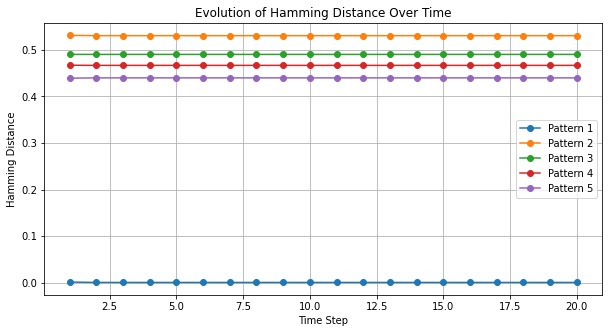

First pattern retrieved successfully.


In [77]:
N = 300  # number of neurones
M = 5    # number of patterns
patterns = generate_patterns(M, N)

# flip 15 bits
initial_state = patterns[0,:].copy()
c = 15/N
flip_indices = np.random.choice(len(initial_state), int(N*c), replace=False)
initial_state[list(flip_indices)] *= -1

# simulating Hopfield network and calculating Hamming distances
steps = 20
current_state = initial_state
distances_hamming = [[] for _ in range(M)]  

for i in range(steps):
    current_state = next_state_optimised(current_state, patterns, beta=4)
    for pattern_index, pattern in enumerate(patterns):
        distance = distance_hamming(current_state, pattern)
        distances_hamming[pattern_index].append(distance)

# plotting evolution of Hamming distance for each pattern
plt.figure(figsize=(10, 5))
for pattern_index, distances in enumerate(distances_hamming):
    plt.plot(range(1, steps + 1), distances, label=f'Pattern {pattern_index + 1}', marker='o')

plt.title('Evolution of Hamming Distance Over Time')
plt.xlabel('Time Step')
plt.ylabel('Hamming Distance')
plt.legend()
plt.grid(True)
plt.show()

# evaluating retrieval accuracy of first pattern
threshold = 0.05 
final_distance_first_pattern = distances_hamming[0][-1]
if final_distance_first_pattern < threshold:
    print("First pattern retrieval successful.")
else:
    print("First pattern retrieval failed.")

**1.4.** For a dictionary of size M = 5, what are the mean and standard deviation (std) of the error of
pattern retrieval, and of the number of retrieved patterns? To compute them, iterate over 10-15 different
initialisations of the dictionary.